<h1 align="center">Interacción entre dos sistemas formados por dados.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

En este <i>Worked Example</i> se estudian los conceptos básicos de la termodinámica estadística por medio de dos sistemas interactuantes formados por partículas que son modeladas con dados. Se estudian dos tipos de partículas: las distinguibles y las indistinguibles.

## 1. Cargar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## 2. Planteamiento del problema

Sean dos sistemas $A_1$ y $A_2$, aislados del resto del universo.  Ambos sistemas están formados por partículas que se representarán por $n_1$ y $n_2$, respectivamente, tal que $N=n_1 + n_2$ es una constante. Todos los dados tiene igual número $C$ de caras, cada una marcada con un simbolo diferenet y la ocurrencia de cada cara tiene igual probabilidad. Se asume que cada dado contribuye al sistema con la misma energía $\delta E$, independiente del valor de su cara. Si $\Omega_1$ es el número de estados del sistema $A_1$ y $\Omega_2$, de $A_2$:

**2.1.** ¿Cuánto es el número de estados $\Omega_T$ del sistema combinado si los dados son distinguibles?

**2.2.** ¿Cuánto es el número de estados $\Omega_T$ del sistema combinado si los dados son indistinguibles?

**2.3.** ¿Cómo depende la temperatura del número de dados?

**2.4.** ¿Cómo se comporta la entropía de cada sistema por separado y como un todo?

## 3. Métodos

In [2]:
def next(last, base):
    L = len(last)-1
    last[-1] += 1
    for i in range(L, 0, -1):
        if last[i] > base:
            last[i] = 1
            last[i-1] += 1
    if last[0] > base:
        last[0] = 1
        last = [1] + last
    return last

In [3]:
def dices_values(N, C):
    if N == 0:
        return []
    state = [1 for i in range(N)]; state[-1] = 0
    all_states = []
    while len(state) == N:
        state = next(state, C)
        all_states.append(state.copy())
    return all_states[:-1]

In [4]:
def distinguible_dices(states):
    if len(states) == 0:
        return 1
    return len(states)

In [5]:
def indistinguishable_values(states):
    if len(states) == 0:
        return 1
    sorted_dices = [np.array2string(np.sort(d)) for d in states]
    return list(Counter(sorted_dices).keys())

In [6]:
def indistinguishable_dices(states):
    if len(states) == 0:
        return 1
    sorted_dices = [np.array2string(np.sort(d)) for d in states]
    return len(Counter(sorted_dices).keys())

In [7]:
def get_data(N, C, fun_dices):
    data_dict = {
            '$n_1$':[],
            '$n_2$':[],
            '$\Omega_1$':[],
            '$\Omega_2$':[],
            '$\Omega_T$':[]
        }
    fun = distinguible_dices
    knew_omega = {}
    for n1 in range(N+1):
        n2 = N - n1
        if not n1 in knew_omega.keys():
            knew_omega[n1] = fun_dices(dices_values(n1, C))
        if not n2 in knew_omega.keys():
            knew_omega[n2] = fun_dices(dices_values(n2, C))
        Omega_1 = knew_omega[n1]
        Omega_2 = knew_omega[n2]
        data_dict['$n_1$'].append(n1)
        data_dict['$n_2$'].append(n2)
        data_dict['$\Omega_1$'].append(Omega_1)
        data_dict['$\Omega_2$'].append(Omega_2)
        data_dict['$\Omega_T$'].append(Omega_1 * Omega_2)
    return pd.DataFrame(data_dict)

## 4. Dados distinguibles
Cuando los dados se pueden diferenciar entre si, por ejemplo, cada dado tiene un color diferente, entonces, un estado \[1, 2, 1] será diferente de otro \[2, 1, 1], a pesar de tener los mismos números en las caras de los dados.

### 4.1. Ejemplo

In [8]:
N = 2 # Número de dados
C = 4 # Número de caras de cada dado
states = dices_values(N, C)
pd.DataFrame(states, columns=['d%d' % (d+1) for d in range(N)])

,d1,d2
0,1,1
1,1,2
2,1,3
3,1,4
4,2,1
5,2,2
6,2,3
7,2,4
8,3,1
9,3,2


In [9]:
print('Número de estados: %d' % distinguible_dices(states))

Número de estados: 16


### 4.2. Dos sistemas de dados distinguibles interactuantes con un valor constante de dados

In [10]:
N = 8; C = 4
dist_data = get_data(N, C, distinguible_dices)
dist_data

,$n_1$,$n_2$,$\Omega_1$,$\Omega_2$,$\Omega_T$
0,0,8,1,65536,65536
1,1,7,4,16384,65536
2,2,6,16,4096,65536
3,3,5,64,1024,65536
4,4,4,256,256,65536
5,5,3,1024,64,65536
6,6,2,4096,16,65536
7,7,1,16384,4,65536
8,8,0,65536,1,65536


## 5. Dados indistinguibles
En este caso es imposible identificar un dado del otro, por lo tanto, es imposible diferenciar un estado \[1, 2, 1] de otro \[2, 1, 1].  Esto implica que todos los estados que tengan números similares en las caras de los dados, corresponden con un mismo estado.

### 5.1. Ejemplo

In [11]:
N = 2 # Número de dados
C = 4 # Número de caras de cada dado
states = dices_values(N, C)
indist = indistinguishable_values(states)
print('Número de estados %d' % len(indist))
print(indist)

Número de estados 10
['[1 1]', '[1 2]', '[1 3]', '[1 4]', '[2 2]', '[2 3]', '[2 4]', '[3 3]', '[3 4]', '[4 4]']


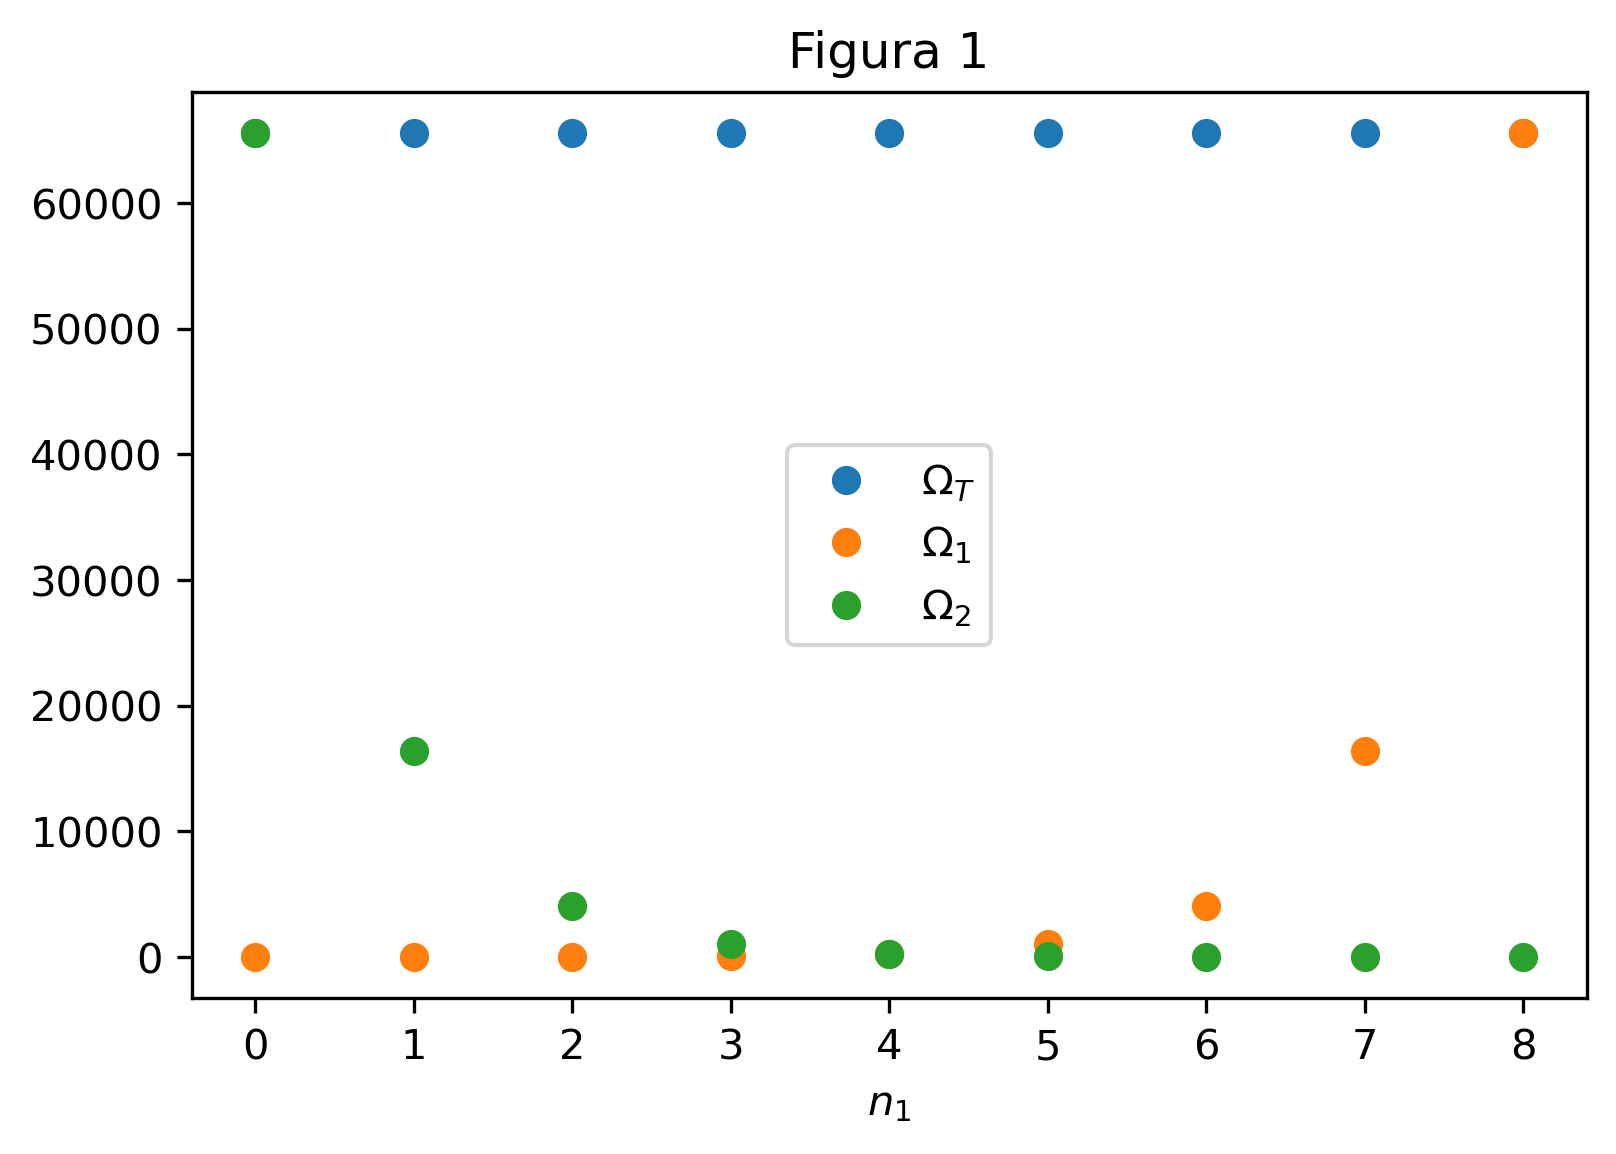

In [27]:
plt.figure(dpi=300)
plt.title('Figura 1')
_ = dist_data.plot( 
    x='$n_1$', 
    y=['$\Omega_T$', '$\Omega_1$', '$\Omega_2$'], 
    marker='o', 
    linestyle = 'None', 
    ax=plt.gca())

### 5.2. Dos sistemas de dados indistinguibles interactuantes con un valor constante de dados

In [12]:
N = 8; C = 4
indist_data = get_data(N, C, indistinguishable_dices)
indist_data

,$n_1$,$n_2$,$\Omega_1$,$\Omega_2$,$\Omega_T$
0,0,8,1,165,165
1,1,7,4,120,480
2,2,6,10,84,840
3,3,5,20,56,1120
4,4,4,35,35,1225
5,5,3,56,20,1120
6,6,2,84,10,840
7,7,1,120,4,480
8,8,0,165,1,165


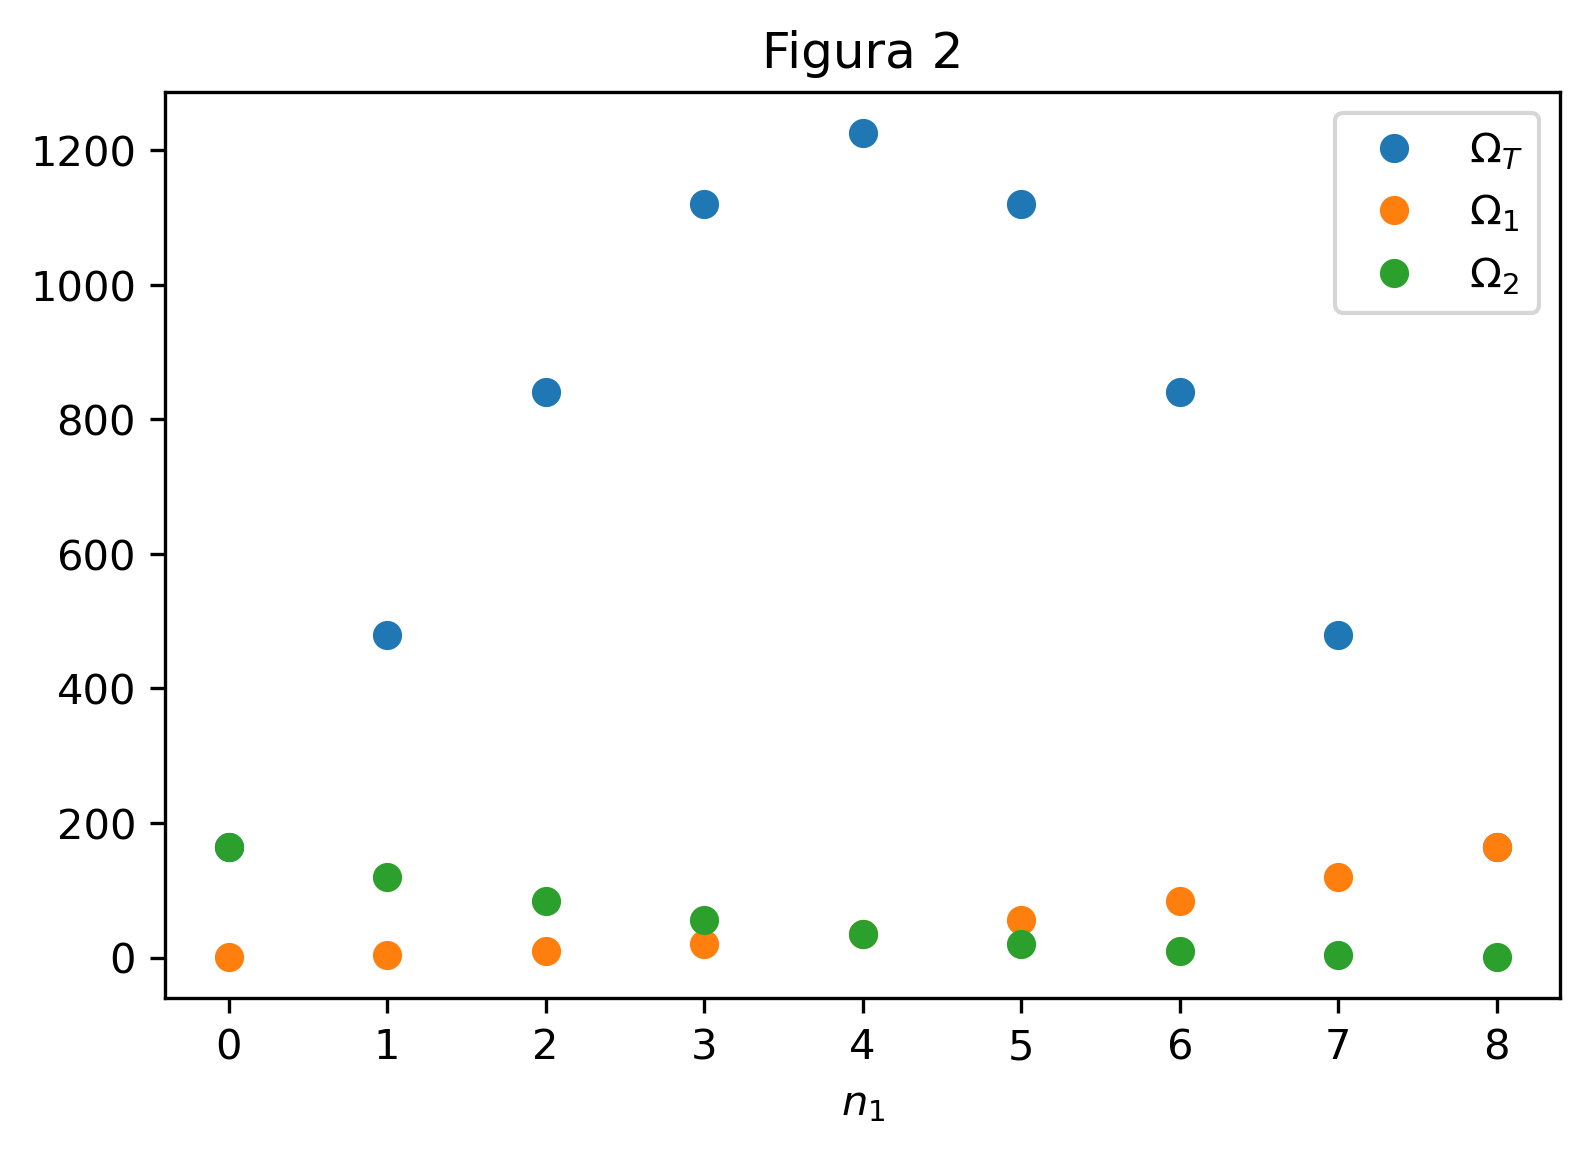

In [28]:
plt.figure(dpi=300)
plt.title('Figura 2')
_ = indist_data.plot(
    x='$n_1$', 
    y=['$\Omega_T$', '$\Omega_1$', '$\Omega_2$'], 
    marker='o', 
    linestyle = 'None', 
    ax=plt.gca())

## 6. Entropia y Temperatura
La probabilidad $P_T(E_T)$ tiene su valor máximo en el estado de equilibrio, par el cual se cumple que $\beta_1 = \beta_2$, para,

$$\beta_i = \frac{\partial ln\{\Omega_i(E_i)\}}{\partial E_i} = \frac{1}{k_B}\frac{\partial S_i}{\partial E_i}$$

Donde $S_i = k_B ln\{\Omega_i(E_i)\}$ es la entropía del sistema i-ésimo y el parámetro $\beta$ se relaciona con la temperatura absoluta $T$ por medio de la constante de Boltzman $k_B$,

$$k_B T = \frac{1}{\beta}$$

## 6.1. Dados distinguibles

In [14]:
dist_data['$S_1/k_B$'] = np.log(dist_data['$\Omega_1$'])
dist_data['$S_2/k_B$'] = np.log(dist_data['$\Omega_2$'])
dist_data['$S_T/k_B$'] = dist_data['$S_1/k_B$'] + dist_data['$S_2/k_B$']
dist_data['$k_B T_1$'] =  1/np.gradient(dist_data['$S_1/k_B$'])
dist_data['$k_B T_2$'] = -1/np.gradient(dist_data['$S_2/k_B$'])
dist_data

,$n_1$,$n_2$,$\Omega_1$,$\Omega_2$,$\Omega_T$,$S_1/k_B$,$S_2/k_B$,$S_T/k_B$,$k_B T_1$,$k_B T_2$
0,0,8,1,65536,65536,0.000000,11.090355,11.090355,0.721348,0.721348
1,1,7,4,16384,65536,1.386294,9.704061,11.090355,0.721348,0.721348
2,2,6,16,4096,65536,2.772589,8.317766,11.090355,0.721348,0.721348
3,3,5,64,1024,65536,4.158883,6.931472,11.090355,0.721348,0.721348
4,4,4,256,256,65536,5.545177,5.545177,11.090355,0.721348,0.721348
5,5,3,1024,64,65536,6.931472,4.158883,11.090355,0.721348,0.721348
6,6,2,4096,16,65536,8.317766,2.772589,11.090355,0.721348,0.721348
7,7,1,16384,4,65536,9.704061,1.386294,11.090355,0.721348,0.721348
8,8,0,65536,1,65536,11.090355,0.000000,11.090355,0.721348,0.721348


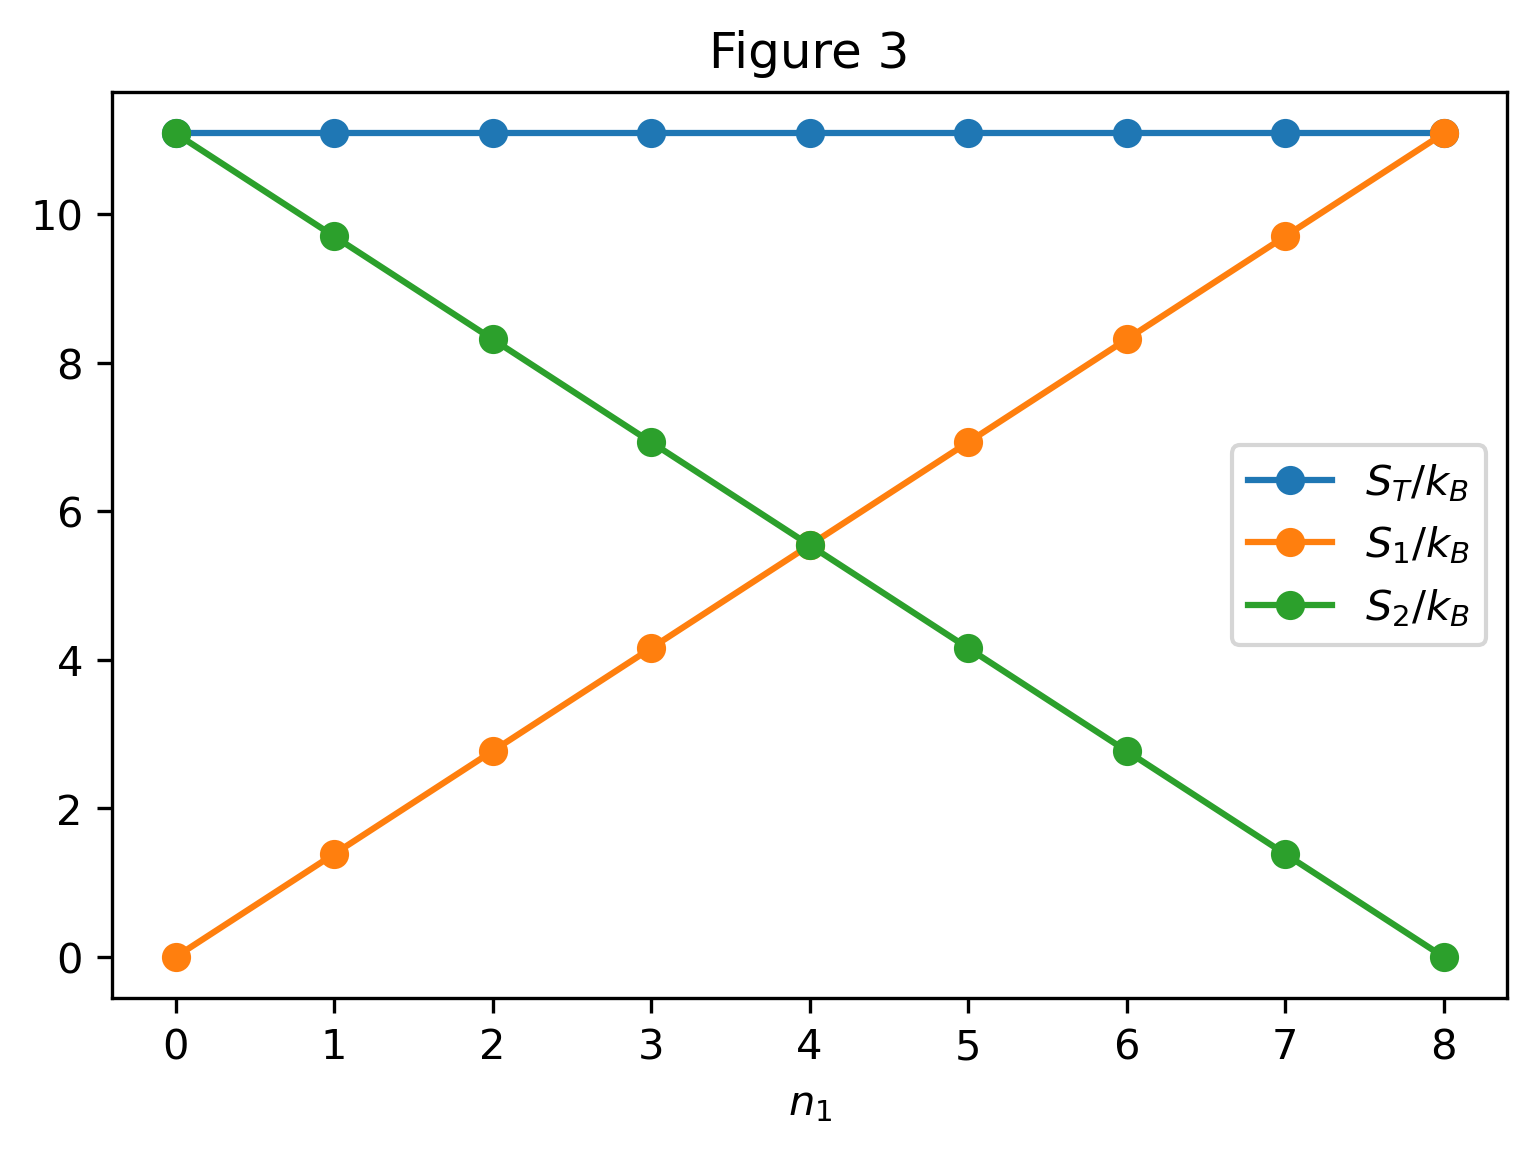

In [23]:
plt.figure(dpi=300)
plt.title('Figura 3')
_ = dist_data.plot(x='$n_1$', y=['$S_T/k_B$', '$S_1/k_B$', '$S_2/k_B$'], marker='o', ax=plt.gca())

## 6.2. Dados indistinguibles

In [15]:
indist_data['$S_1/k_B$'] = np.log(indist_data['$\Omega_1$'])
indist_data['$S_2/k_B$'] = np.log(indist_data['$\Omega_2$'])
indist_data['$S_T/k_B$'] = indist_data['$S_1/k_B$'] + indist_data['$S_2/k_B$']
indist_data['$k_B T_1$'] =  1/np.gradient(indist_data['$S_1/k_B$'])
indist_data['$k_B T_2$'] = -1/np.gradient(indist_data['$S_2/k_B$'])
indist_data

,$n_1$,$n_2$,$\Omega_1$,$\Omega_2$,$\Omega_T$,$S_1/k_B$,$S_2/k_B$,$S_T/k_B$,$k_B T_1$,$k_B T_2$
0,0,8,1,165,165,0.000000,5.105945,5.105945,0.721348,3.140174
1,1,7,4,120,480,1.386294,4.787492,6.173786,0.868589,2.962398
2,2,6,10,84,840,2.302585,4.430817,6.733402,1.242670,2.624190
3,3,5,20,56,1120,2.995732,4.025352,7.021084,1.596471,2.284490
4,4,4,35,35,1225,3.555348,3.555348,7.110696,1.942465,1.942465
5,5,3,56,20,1120,4.025352,2.995732,7.021084,2.284490,1.596471
6,6,2,84,10,840,4.430817,2.302585,6.733402,2.624190,1.242670
7,7,1,120,4,480,4.787492,1.386294,6.173786,2.962398,0.868589
8,8,0,165,1,165,5.105945,0.000000,5.105945,3.140174,0.721348


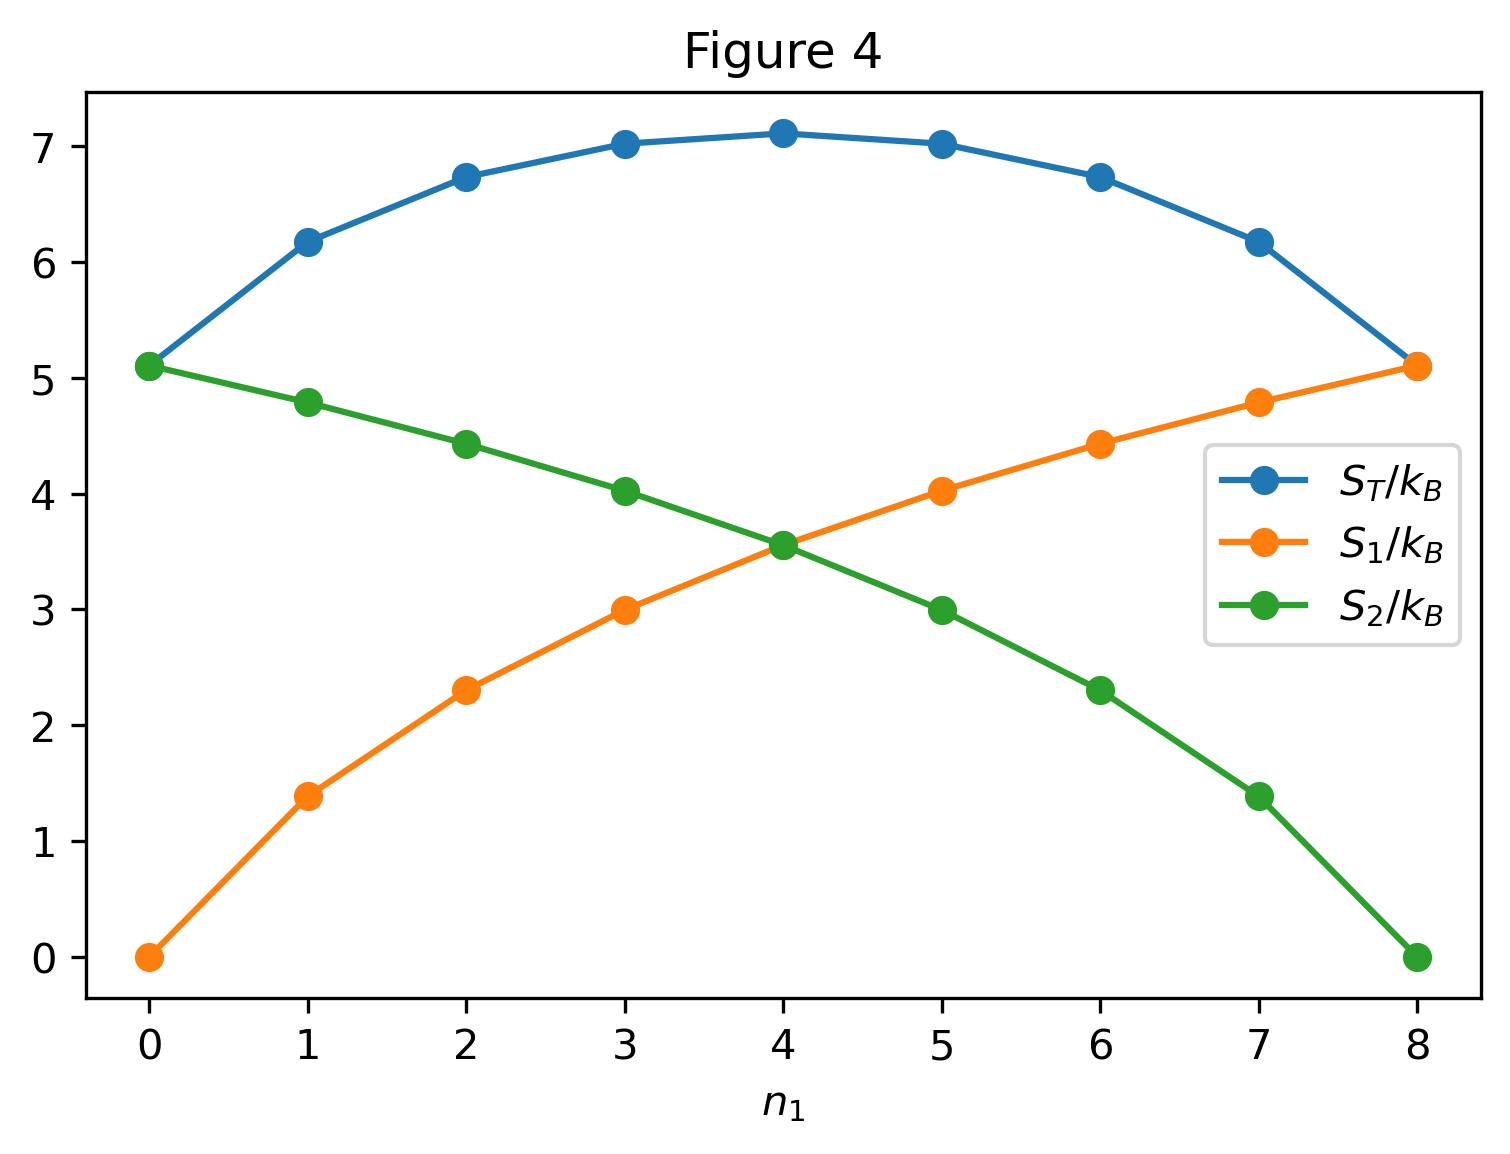

In [29]:
plt.figure(dpi=300)
plt.title('Figure 4')
_ = indist_data.plot(x='$n_1$', y=['$S_T/k_B$', '$S_1/k_B$', '$S_2/k_B$'], marker='o', ax=plt.gca())

End!